In [1]:
import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Analytical Distributions

We can use analytical distributions to help us learn from our data, and to build towards using our data as a tool. 

Here we can start by using an analytical distribution to build a model that will help us to predict the daily investment return on the stock price of Microsoft. 


In [2]:
#Load data, loose the excess
df = pd.read_csv('data/MSFT.csv')
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2018-01-01,88.190002
1,2018-01-08,89.599998
2,2018-01-15,90.000000
3,2018-01-22,94.059998
4,2018-01-29,91.779999


#### Data Preparation

We need to change the original data into the daily return. This code uses the diff() function to calculate the difference in price from yesterday to today. This daily gain/loss is then divided by the closing price to produce the daily percentage return, which is what we will look at. 

In [3]:
#Do a little manipulation to get the return
df['diff'] = pd.Series(np.diff(df['Close']))
df['return'] = df['diff']/df['Close']
df = df[['Date', 'return']].dropna()
df.head()

,Date,return
0,2018-01-01,0.015988
1,2018-01-08,0.004464
2,2018-01-15,0.045111
3,2018-01-22,-0.024240
4,2018-01-29,-0.039224


In [4]:
df.describe()

,return
count,52.000000
mean,0.003190
std,0.030834
min,-0.078435
25%,-0.013976
50%,0.007736
75%,0.022970
max,0.075871


Our new table is the daily return - i.e. if we invested in MSFT one day, what would the return be from my investment from one day to the next. 

The first two days can be taken as an example:
    - From day 1 to day 2 the price goes up apx $1.4
    - $1.4 dollars is approximately 1.6% of the first day price - ~$88
    - So if you invested on day one, you'd gain about 1.6%, or .016 <- That's the return value. 

We can do some of our graphing to take a little look-see and try to determine if this new distribution is normal:

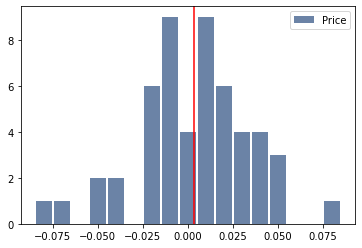

In [5]:
#Histogram
hi = thinkstats2.Hist(round(df["return"], 2), label="Price")
thinkplot.Hist(hi)
plt.axvline(df['return'].mean(), color='red')
thinkplot.Config()

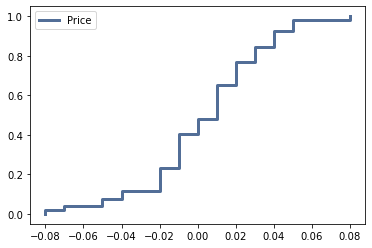

In [6]:
#CDF look
hi_c = thinkstats2.Cdf(hi)
thinkplot.Cdf(hi_c)
thinkplot.Config()

In [7]:
hi_c.Prob(0)

0.4807692307692308

### Check for Normality

These charts look semi-normal, but not totally. Examine the probability plot to see it a bit closer. 

The thinkstats2 file provides this easy to use probability plot function. The book (pg 63ish) has the steps to make this broken out a little bit more. 

The most simple way I can think of to explain it is that it compares if the middle values are near the mean, the low values are near the low, and the high values are near the high. The model line is what we'd expect if the data was perfectly normal, in this one the middle values are close, the low values are a little lower than expected, the high values are a little lower than expected. 

In English, it is more or less normal for values close to the mean, but the values (the actual % return values) on either end of the distribution are a bit lower than we'd expect if it was normal. 

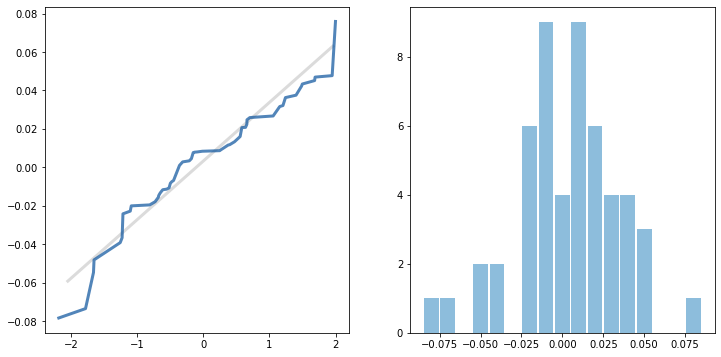

In [8]:
#Create probability plot
thinkplot.PrePlot(2,1,2)
thinkplot.SubPlot(1)
thinkstats2.NormalProbabilityPlot(df["return"])
thinkplot.SubPlot(2)
thinkplot.Hist(hi)

Does it match the line? Is it normal? Ehhhhh.... kind of. The highest and lowest values are both lower than expected. For values near the mean, it is pretty close. 

We can live on the wild side, assume that it is close enough to normal, and 'use' that normality to do some stuff. 

### The Power of Being Normal

One of the super useful things about these analytical distributions is the simplicity. A normal curve is always the same basic shape, so all we need to do to create one is to know the mean (mu) and standard deviation (sigma). This allows us to easily extrapolate from what we know, and use all the attributes of the normal distribution. Again, this is an approximation, it is not bang on, but that is useful in a lot of cases. 

The fact that the data in our emperical sample will follow (we hope) that normal distribution pattern, we can apply all of the general knowledge of normal distributions to our situation - the knowledge that X% will fall within certain standard deviation ranges, the ability to infer percentiles, etc... This works even if we don't have a massive sample of data that would allow us to generate those distribution patterns from scratch. 

While everything in the world isn't normal, many things are, and that knowledge helps us substantially. We can safely assume things such as blood pressure are normally distributed, so if you are able to take a small sample of blood pressure from the population you're looking at, calculate the mean, count, and variance, and create an analytical distribution that you can generalize from confidently. 

#### The Predictive Power of Analytical Distributions

One of the things that our analytical distribution relationship allows us to do is to have a pattern from which to make predictions from. For example, if we find that our daily return data:
<ul>
<li> Is normally distributed. 
<li> Has a mean and a standard distribution that we can calculate.
</ul>

We can then use that information to help us predict - for example if a day trader is trading MSFT stock and he notices that some shares he purchased earlier in the day are up an amount equal to 3 standard deviations in the normal distribution of the daily gain, that would tell the trader that his daily gain is above ~99% of all daily increases in the stock, so it is pretty likely they are in a good position to sell. This isn't definitive of course, the stock could skyrocket, but the more data we have and the better the data fits our model, the more accurate our predictions can be. This is a key concept of machine learning. 

In [9]:
#Create a normal distribution based on the characteristics of the kinda-normal data not identical to the original data due to discrepencies 
import scipy.stats
mu = df["return"].mean()
sigma = df["return"].std()
normz = scipy.stats.norm(mu, sigma)

<AxesSubplot:xlabel='return', ylabel='Density'>

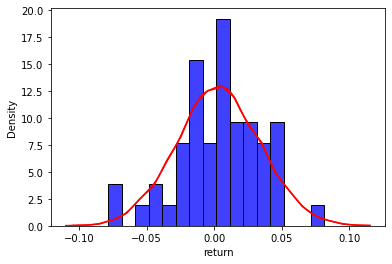

In [10]:
sns.histplot(data=normz.rvs(10000),binwidth=0.01, color='red', stat='density', kde=True, element='poly', fill=False)
sns.histplot(data=df['return'],binwidth=0.01, color='blue', stat='density')
#the red is the analytical prediction of the normal distribution and the blue represents the actual data 

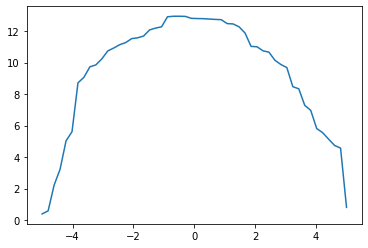

In [11]:
import matplotlib.pyplot as plt
data = np.sort(df["return"])
x = np.linspace(-5,5, 52)
plt.plot(x,normz.pdf(data))
plt.show()

#### Distribution Exercises

Try these!

In [12]:
#How many weekly returns are greater than 5%, but less than 10%?
lowVal = normz.cdf(.05)
hiVal = normz.cdf(.1)
print(str(lowVal) + " : " + str(hiVal))
print(hiVal-lowVal)

0.9355110908938288 : 0.9991544890514654
0.06364339815763664


In [13]:
normz.cdf(0)

0.45880600312056974

### Test Normality Analytically

We have done our normality tests by visually inspecting the distribution. This works quite well, and we can rely on it going forward. There is also a way to do a normality test analytically. 

<b>Note:</b> this analytical test is not necessarily better than the visual one. The visual one is good, and if I am doing something, I would generally use that. In particular, it is much more informative if you have data that may be mostly normal, but differs largely due to something like a few outliers. We can see this visually when inspecting the normality, and take action like filter the outlier out. This test can be scripted, so automated processes can be created; as well, if a distribution is closer to a normal distribution pattern, this test will measure those small differences with more precision than the visual method. 

In [14]:
#Check Normality with code
k2, p = scipy.stats.normaltest(df["return"])
p
# P is a measure to see if it is normal or not. it is sed in the hypothesis test. 

0.23901164802625616

In [15]:
#If we were to write out our decision....
alpha = .05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
#The hypothesis is that our distribution is normal 

The null hypothesis cannot be rejected


### Exercise #1

Now try one...

<ul>
<li>Check and see if NFL weights data fits a normal dist.
<li>Create a normal analytical distribution based off of the emperical data.
<li>What percentage of people are between 265 and 325? Using the empirical?
<li>Using the analytical?
<li>What percentage of people are greater than your weight, using both distributions?
</ul>

If you're fast, try with NBA Weights

In [16]:
#Load data, filter out junk, put in series
dfNFL = pd.read_csv("data/NFL.csv")
dfNFL = dfNFL[dfNFL["Weight (lbs)"] > 100]
nfl = pd.Series(dfNFL["Weight (lbs)"])
nfl.head()

0    185.0
1    235.0
2    230.0
3    255.0
4    305.0
Name: Weight (lbs), dtype: float64

<AxesSubplot:xlabel='Weight (lbs)', ylabel='Count'>

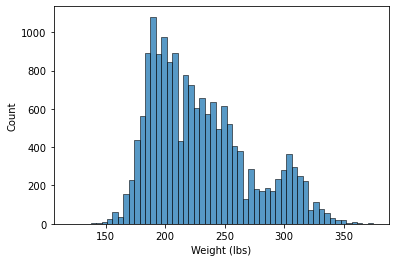

In [17]:
sns.histplot(nfl)

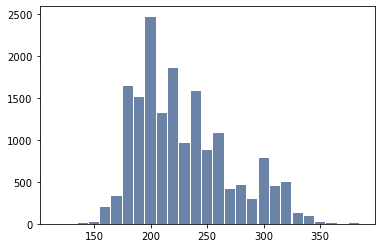

In [18]:
#Hist
from thinkplot import axhline
nflh = thinkstats2.Hist(round(nfl, -1))
thinkplot.Hist(nflh)
thinkplot.Config()

In [19]:
nfl.describe()

count    17098.000000
mean       229.527664
std         41.933053
min        119.000000
25%        196.000000
50%        220.000000
75%        255.000000
max        375.000000
Name: Weight (lbs), dtype: float64

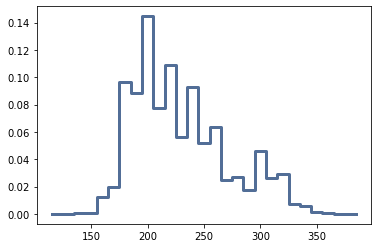

In [20]:
#pmf
nflp = thinkstats2.Pmf(round(nfl, -1))
thinkplot.Pmf(nflp)
thinkplot.Config()

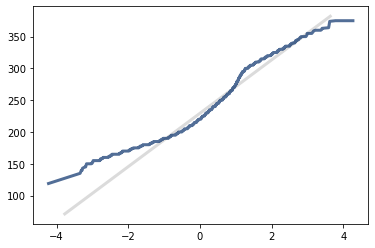

In [21]:
#Normal Prob Plot
thinkplot.clf
thinkstats2.NormalProbabilityPlot(nfl)

In [22]:
#Make analytical dist.
mu1 = nfl.mean()
sigma1 = nfl.std()
#sigma1=np.std(nfl) also calculated the standar deviation 
mu1, sigma1

(229.52766405427536, 41.93305341008267)

In [23]:
#Make distribution
nflN = scipy.stats.norm(mu1,sigma1)
nflN.rvs(5)
#rvs will give the randon value from the normal set

array([183.14102025, 178.30526119, 216.95505622, 269.75586288,
       253.47163271])

<AxesSubplot:xlabel='Weight (lbs)', ylabel='Density'>

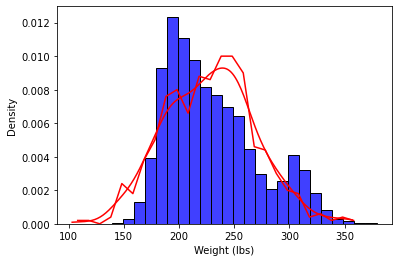

In [24]:
sns.histplot(data=nflN.rvs(500),binwidth=10, color='red', stat='density', kde=True, element='poly', fill=False)
sns.histplot(data=nfl,binwidth=10, color='blue', stat='density')

{'xscale': 'linear', 'yscale': 'linear'}

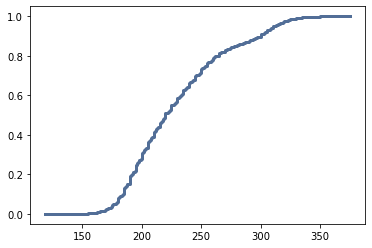

In [25]:
#Make emperical
cdf_emp = thinkstats2.Cdf(nfl)
thinkplot.Cdf(cdf_emp)

In [26]:
#Use them. 
#What percentage of people are between 265 and 325
less325 = cdf_emp.PercentileRank(325)
less325
less265 = cdf_emp.PercentileRank(265)
less265, less325
less325-less265

17.10726400748625

In [27]:
#Analytical
lessA = nflN.cdf(325)
lessA
lessB = nflN.cdf(265)
lessA-lessB

0.18739682507040945

In [28]:
#Who's fatter than me?
empFat = (1 - cdf_emp.Prob(168))
anFat = (1 - nflN.cdf(168))
anFat, empFat

(0.9288504816494664, 0.9830974382968768)

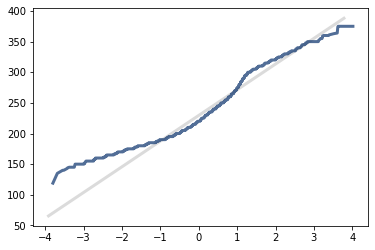

In [29]:
thinkstats2.NormalProbabilityPlot(nfl)

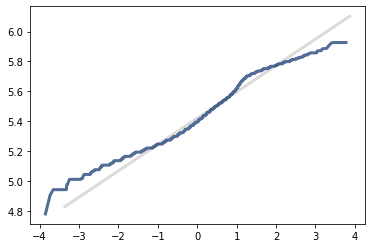

In [30]:
#LogNormal Prob Plot
thinkstats2.NormalProbabilityPlot(np.log(nfl))

In [31]:
#Make Analytical Distribution
mu2 = nfl.mean()
sigma2 = nfl.std()
mu2, sigma2

(229.52766405427536, 41.93305341008267)

In [32]:
#Make model
lnnfl = scipy.stats.lognorm(s=sigma2, scale=math.exp(mu2))


In [33]:
lnnfl.rvs(1000).mean()

4.511031428671359e+147

In [34]:
ln325 = lnnfl.cdf(math.exp(325))
ln265 = lnnfl.cdf(math.exp(265))
ln325,ln265, (ln325-ln265)

(0.988600315792898, 0.8012034907224885, 0.18739682507040945)

### Exercise #2 - LogNormal Distribution

We can try another one - lognormal.

We will look at the salary distribution of people in Spain.

In [35]:
#Load and preview data
dfSP = pd.read_csv("data/spain_salary.csv")
dfSP.head()

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86


In [36]:
#I'm going to extract the income into a Pandas Series. This is a 1D data structure
#Not much differs in using it, but we should see it, it is common
dfSP = dfSP[dfSP["statistic"] == "mean"]
spinc = pd.Series(dfSP["gross_income_euros"])
spinc

0       23646.50
1       23156.34
2       23106.30
3       22858.17
4       22697.86
          ...   
3185    23097.08
3186    23512.09
3187    23641.44
3188    23240.00
3189    22549.68
Name: gross_income_euros, Length: 540, dtype: float64

Do some basic preview stuff for a few cells....

In [37]:
spinc.describe()

count      540.000000
mean     21865.320611
std       3217.149924
min      16020.200000
25%      19344.052500
50%      21371.710000
75%      23773.370000
max      31618.970000
Name: gross_income_euros, dtype: float64

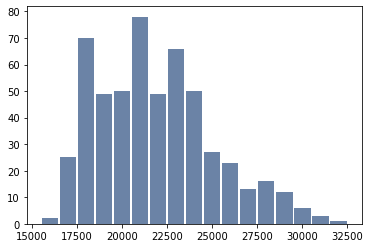

In [38]:
#Hist
histSP = thinkstats2.Hist(round(spinc, -3))
thinkplot.Hist(histSP)
thinkplot.Config()

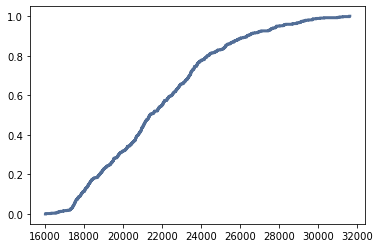

In [39]:
#CDF
cdfSP = thinkstats2.Cdf(spinc)
thinkplot.Cdf(cdfSP)
thinkplot.Config()

Ok, is it lognormal?

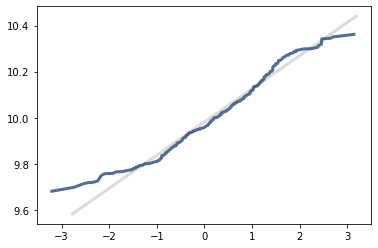

In [40]:
#Plot normal prob curve
thinkstats2.NormalProbabilityPlot(np.log(spinc))

How about normal?

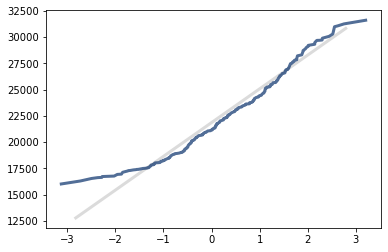

In [41]:
thinkstats2.NormalProbabilityPlot(spinc)

What do these mean? 

The lognormal looks to be slightly more accurate through the curve, it is probably a better representation.  


We can try another, maybe a Pareto 

In [42]:
df_fifa = pd.read_csv("fifa_eda.csv")
df_fifa = df_fifa[df_fifa["Wage"] > 0]
fifa = df_fifa["Wage"]
fifa.head()


FileNotFoundError: [Errno 2] No such file or directory: 'fifa_eda.csv'

In [ ]:
fifa.describe()

count    17966.000000
mean         9.861850
std         22.117274
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage, dtype: float64

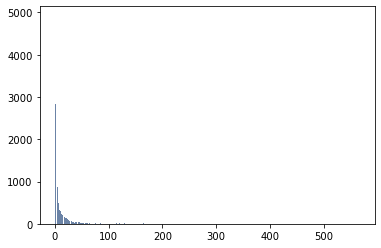

In [ ]:
h = thinkstats2.Hist(fifa)
thinkplot.Hist(h)

{'xscale': 'linear', 'yscale': 'linear'}

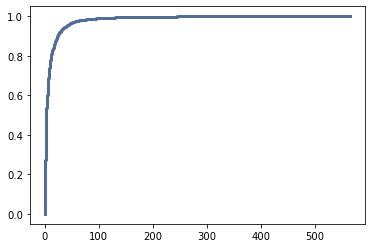

In [ ]:
c = thinkstats2.Cdf(fifa)
thinkplot.Cdf(c)

Is it pareto?

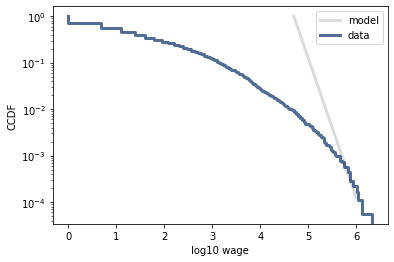

In [ ]:
#Compare to pareto
log_wage = np.log(fifa)
cdf_log = thinkstats2.Cdf(log_wage)

xs, ys = thinkstats2.RenderParetoCdf(alpha=3, low=0, high=1e6, xmin=50000)
thinkplot.Plot(np.log10(xs), 1-ys, label="model", color=".8")
thinkplot.Cdf(cdf_log, complement=True, label="data") 
thinkplot.Config(xlabel='log10 wage',ylabel='CCDF',yscale='log')

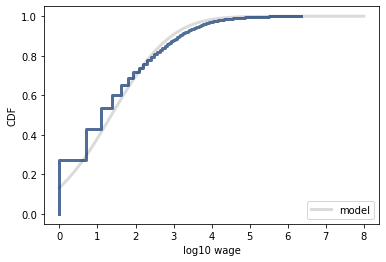

In [ ]:
#Compare it to LogNormal
mu, sigma = log_wage.mean(), log_wage.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')